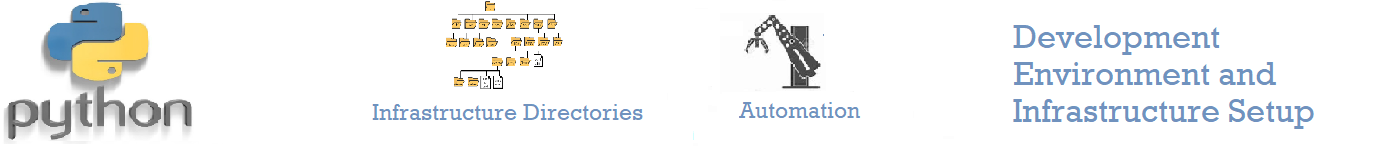

# Development Environment and Infrastructure Setup - House Cleaning
#### by Joe Eberle started on 11_5_2022 and refactored on 11_5_2022 and revised on 11_5_2022

In [1]:
# import the libraries necessary for the process 
import os, glob
from shutil import copyfile, copytree 
import schedule
import file_manager as fm 

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'infrastructure_setup'
cwd = os.getcwd() 

## Optional Step 0 - Initiate logging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

In [7]:
!pip install "chatterbot==1.0.0"


## Step 1 establish infrastructure directory to organize all files

In [4]:
def create_directory_tree(directory):
    ''' The create_directory_tree function will create an organized directory for housing your files and infrastructure '''
    logging.info(f'{solution_name} - Step 1 establish infrastructure directory to organize all files')       
    status = 'Creating Directories: \n' + '\n' + fm.create_directory(directory)
    directory_list = ['html','excel','jupyter_notebook','documentation'\
                      ,'database','powerbi','tableau','images','csv','parquet','feather','pickle'\
                      ,'text','presentation', 'jaepy','py','log']
    for subdir in directory_list:
        status = status + '\n' + fm.create_directory(directory + '/' + subdir)
        logging.info(f'{solution_name} - Creating if non-existent : {directory + "/" + subdir}')                
    return status 

developing_and_testing = True # Unit test for this function  - set this to True or False to turn testing on or off 
if developing_and_testing:
    infrastructure_directory = config.get('global_infrastructure', 'infrastructure_directory')  
    if len(infrastructure_directory)  < 3:
        status = create_directory_tree('c://infrastructure') # establish a default if none exists
    status = create_directory_tree(infrastructure_directory)        
    print(status)

Creating Directories: 

Error attempting to create directory:c://infrastructure
Error attempting to create directory:c://infrastructure/html
Error attempting to create directory:c://infrastructure/excel
Error attempting to create directory:c://infrastructure/jupyter_notebook
Error attempting to create directory:c://infrastructure/documentation
Error attempting to create directory:c://infrastructure/database
Error attempting to create directory:c://infrastructure/powerbi
Error attempting to create directory:c://infrastructure/tableau
Error attempting to create directory:c://infrastructure/images
Error attempting to create directory:c://infrastructure/csv
Error attempting to create directory:c://infrastructure/parquet
Error attempting to create directory:c://infrastructure/feather
Error attempting to create directory:c://infrastructure/pickle
Error attempting to create directory:c://infrastructure/text
Error attempting to create directory:c://infrastructure/presentation
Error attempting 

## Step 2 Organize (copy all file types) into appropriate infrastructure directories

In [5]:
# Move all python .py libraries for easy location 
def copy_and_organize_files(cwd):
    logging.info(f'{solution_name} - Step 3 Organize (copy all file types) into appropriate infrastructure directories')          
    status = 'backup one file type at a time: \n'
    target = "C:/Infrastructure/"
#     status = status + '\n' + fm.copy_all_files(cwd,"jaepy",target+"jaepy/")    # backup python files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"ipynb",target+"jupyter_notebook/")   # backup python files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"html",target+"html/")  # backup python files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"excel",target+"excel/") # backup excel files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"doc",target+"documentation/")  # backup files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"png",target+"images/")  # backup documentation files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"parquet",target+"parquet/") # backup parquet files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"feather",target+"feather/") # backup feather files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"pickle",target+"pickle/") # backup pickle files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"py",target+"py/") # backup python files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"py",target+"jaepy/") # backup python files to archive and easy location     
    status = status + '\n' + fm.copy_all_files(cwd,"pbix",target+"powerbi/")  # backup powerbi files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"tbwx",target+"tableua/") # backup tableua files to archive and easy location        
    status = status + '\n' + fm.copy_all_files(cwd,"txt",target+"text/")  # backup text files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"pptx",target+"presentation/") # backup presentation files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"csv",target+"csv/") # backup presentation files to archive and easy location 
    status = status + '\n' + fm.copy_all_files(cwd,"log",target+"log/") # backup presentation files to archive and easy location 
    
    return(status)


developing_and_testing = True # Unit test for this function  - set this to True or False to turn testing on or off 
if developing_and_testing: 
    import os 
    cwd = os.getcwd() 
    status = copy_and_organize_files(cwd)
    print(status)

backup one file type at a time: 


Disovering files of extension:ipynb in directory:C:\Users\josep to move to directoryC:/Infrastructure/jupyter_notebook/ 
File #1 copying file  Poor Emotional Risk Calculation.ipynb to C:/Infrastructure/jupyter_notebook/ Poor Emotional Risk Calculation.ipynb 
File #2 copying file ADT_Manager.ipynb to C:/Infrastructure/jupyter_notebook/ADT_Manager.ipynb 
File #3 copying file AI Chatbot Diabetes Combined.ipynb to C:/Infrastructure/jupyter_notebook/AI Chatbot Diabetes Combined.ipynb 
File #4 copying file AI Chatbot Diabetes.ipynb to C:/Infrastructure/jupyter_notebook/AI Chatbot Diabetes.ipynb 
File #5 copying file AI Chatbot FamilyServices.ipynb to C:/Infrastructure/jupyter_notebook/AI Chatbot FamilyServices.ipynb 
File #6 copying file AI Chatbot GCASA.ipynb to C:/Infrastructure/jupyter_notebook/AI Chatbot GCASA.ipynb 
File #7 copying file AI Corpus classification.ipynb to C:/Infrastructure/jupyter_notebook/AI Corpus classification.ipynb 
File #8 copying 

## Step 3 Rename the py files to make easier to email 

In [6]:
# Move all python .py libraries for easy location  
def rename_files(directory, file_extension, new_file_extension):
    logging.info(f'{solution_name} - Step 2 Rename the py files to make easier to email')      
    return(fm.copy_and_rename_all_files(directory,"py","jaepy"))

def rename_py_files():
    import os 
    status = rename_files('c:\\infrastructure\\jaepy\\', 'py', 'jaepy')
    return status
    
developing_and_testing = True # Unit test for this function  - set this to True or False to turn testing on or off 
if developing_and_testing: 
    print(rename_py_files())


Discovering files of extension: py in directory: c:\infrastructure\jaepy\ 
File #1 copy-rename:bot.py to:bot.jaepy
File #2 copy-rename:chat_gui.py to:chat_gui.jaepy
File #3 copy-rename:Color_Settings.py to:Color_Settings.jaepy
File #4 copy-rename:design_goal.py to:design_goal.jaepy
File #5 copy-rename:display_descriptive.py to:display_descriptive.jaepy
File #6 copy-rename:docbot.py to:docbot.jaepy
File #7 copy-rename:file_manager.py to:file_manager.jaepy
File #8 copy-rename:glossary_of_terms.py to:glossary_of_terms.jaepy
File #9 copy-rename:gui.py to:gui.jaepy
File #10 copy-rename:library_registry.py to:library_registry.jaepy
File #11 copy-rename:logger.py to:logger.jaepy
File #12 copy-rename:quick_logger.py to:quick_logger.jaepy
File #13 copy-rename:rpa_excel.py to:rpa_excel.jaepy
File #14 copy-rename:settings.py to:settings.jaepy
File #15 copy-rename:solution_documentation_configuring_settings.py to:solution_documentation_configuring_settings.jaepy
File #16 copy-rename:solution_docu

## Step 4 copy and backup all infrastructure to a team shareable location 

In [7]:
# This will copy entire source directory to a backup destination and an archive 
def backup_infrastructure():
    status = 'Backing up entire infrastructure directory: \n'
    logging.info(f'{solution_name} - Step 4 copy and backup all infrastructure to a team shareable location')       

    infrastructure_directory = config.get('global_infrastructure', 'infrastructure_directory') 
    print(infrastructure_directory)
    infrastructure_directory_backup = config.get('global_infrastructure', 'infrastructure_directory_backup') 
    print(infrastructure_directory_backup)    
    infrastructure_directory_archive = infrastructure_directory_backup.replace('backup','archive')
    print(infrastructure_directory_archive)    
    copytree(infrastructure_directory, infrastructure_directory_backup, dirs_exist_ok=True)
    copytree(infrastructure_directory, infrastructure_directory_archive, dirs_exist_ok=True)  
    copytree(infrastructure_directory, 'C://working_directory', dirs_exist_ok=True)   
  
    return(status)

developing_and_testing = True # Unit test for this function  - set this to True or False to turn testing on or off 
if developing_and_testing: 
    print(backup_infrastructure())

c://infrastructure
c://infrastructure_backup
c://infrastructure_archive
Backing up entire infrastructure directory: 



In [8]:
# # optional education - The following code will only run if educating is set to True for this solution
# if config.get('global_infrastructure', 'documenting') == 'True':
#     import os 
#     import solution_documentation_infrastructure_setup as sd    # Establish the solutions documentation as sd 
#     solution_documentation = sd.get_solution_documentation()  
#     print(solution_documentation) 
#     solution_document_file_name =  config.get('global_infrastructure', 'infrastructure_directory') + '/' + config.get('global_infrastructure', 'documentation_directory')+ '/' + solution_name + config.get('global_infrastructure', 'documentation_extension')
#     sd.save_documentation(solution_document_file_name) 
#     print(f'Solution Documention saved to file: {solution_document_file_name}')      
#     documentation_file_name = f'C://working_directory//documentation//documentation_{solution_name}.doc'
#     sd.create_solution_documentation_file(documentation_file_name, solution_name)
 
    
# if config.get(solution_name, 'talking_code') == 'True': 
#     import talking_code as tc  
#     tc.say(solution_documentation)

## Optional Step - Schedule frequent backups or Backups for specific Times 

In [9]:
def show_time(): 
    import datetime
    current_time = datetime.datetime.now()
    show_time = f'year:{current_time.year}' + f' month:{current_time.month}' + f' day:{current_time.day}'
    show_time = show_time + f' hour:{current_time.hour}' + f' minute:{current_time.minute}' + f' second:{current_time.second}' 
    show_time = show_time + f' microsecond:{current_time.microsecond}' 
    print(show_time)
    return(show_time)

In [10]:
# schedule.every(2).minutes.do(backup_infrastructure)
# schedule.every(1).minutes.do(show_time)
# schedule.every(2).minutes.do(rename_py_files)
# schedule.every().day.at('07:00').do(backup_infrastructure)
# schedule.every().day.at('21:00').do(backup_infrastructure)


In [11]:
# import time
# scheduled_backup = False
# if scheduled_backup: 
#     print('Running Scheduled jobs') 
# else:
#     print('Not configured to schedule backups') 
# while scheduled_backup:
#     schedule.run_pending()
#     time.sleep(1)

In [12]:
# Calculate and classify the process performance 
os.chdir(cwd)
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-06-23 09:46:12,332 - INFO - START infrastructure_setup =============================================
2023-06-23 09:46:12,332 - INFO - START infrastructure_setup Start Time = 2023-06-23 09:46:12
2023-06-23 09:46:12,332 - INFO - infrastructure_setup Step 0 - Initialize the configuration file parser
2023-06-23 09:46:12,344 - INFO - infrastructure_setup - Step 1 establish infrastructure directory to organize all files
2023-06-23 09:46:12,345 - INFO - infrastructure_setup - Creating if non-existent : c://infrastructure/html
2023-06-23 09:46:12,345 - INFO - infrastructure_setup - Creating if non-existent : c://infrastructure/excel
2023-06-23 09:46:12,345 - INFO - infrastructure_setup - Creating if non-existent : c://infrastructure/jupyter_notebook
2023-06-23 09:46:12,346 - INFO - infrastructure_setup - Creating if non-existent : c://infrastructure/documentation
2023-06-23 09:46:12,346 - INFO - infrastructure_setup - Creating if non-existent : c://infrastructure/database
2023-06-23 09:46